<h1>PROJECT PHASE 2</h1>




# **Introduction to Data Science - Group 2**

* Karthikeyan Ravichandran-2260006
* Pooyan Ghodrati-2342802
* Tejas Murali-1612032
* Lekha Chittajallu-2311347
* Sunil Kumar Kommineni-2304770
* Vineeth Yadama-2295464

### MODELING TECHNIQUES

>Importing the libraries

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

>Loading the Dataset

In [ ]:
#load the cleaned data into a data frame 'df'
df=pd.read_csv("/content/Group_2_Clean_Data.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
df=pd.read_csv("/content/gdrive/My Drive/Group_2_Clean_Data.csv")


Mounted at /content/gdrive


In [ ]:
#checking the features
df.columns


Index(['Unnamed: 0', 'Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp',
       'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound',
       'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR',
       'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [ ]:
#checking the rows and columns
df.shape

(9399, 20)

In [ ]:
#dropping the unrelated or non operational columns
df=df.drop("Unnamed: 0",axis=1)
df=df.drop(df.columns[0:2],axis=1)


In [ ]:
#defining the predictors(X) and target(y) columns
y=df[df.columns[-1]]
X=df[df.columns[:-1]]

In [ ]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#scaling the features for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_train

462     3
4842    0
449     3
2167    0
8818    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: Room_Occupancy_Count, Length: 7519, dtype: int64

<h1> LINEAR REGRESSION </h1>

In [ ]:
#defining the linear regression model
linear_reg_model = LinearRegression()

#fitting the training data
linear_reg_model.fit(X_train_scaled, y_train)

#predicting the outcomes
linear_reg_pred = linear_reg_model.predict(X_test_scaled)


In [ ]:
#calculation of mean square error
linear_reg_pred_rounded_predictions = np.round(linear_reg_pred)
linear_reg_pred_rounded_predictions = np.maximum(linear_reg_pred_rounded_predictions, 0)  # Ensure non-negativity
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred_rounded_predictions)


In [ ]:
linear_reg_pred_rounded_predictions

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
#checking the mse of linear regression
linear_reg_mse

0.05638297872340425

<h2>Learning curve of Linear Regression</h2>

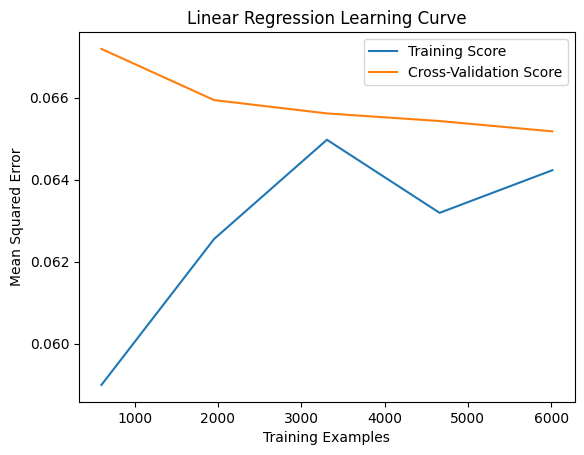

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('Linear Regression Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
y_test

3742    0
4836    0
4541    0
5268    0
3782    0
       ..
1219    0
3918    0
2650    0
2246    0
8142    0
Name: Room_Occupancy_Count, Length: 1880, dtype: int64

<h1> KNN </h1>

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)


In [ ]:
knn_pred_rounded_predictions = np.round(knn_pred)
knn_pred_rounded_predictions = np.maximum(knn_pred_rounded_predictions, 0)  # Ensure non-negativity
knn_mse = mean_squared_error(y_test, knn_pred_rounded_predictions)

In [ ]:
np.unique(knn_pred_rounded_predictions)

array([0., 1., 2., 3.])

In [ ]:
knn_mse

0.009574468085106383

<h2>Learning Curve of KNN</h2>

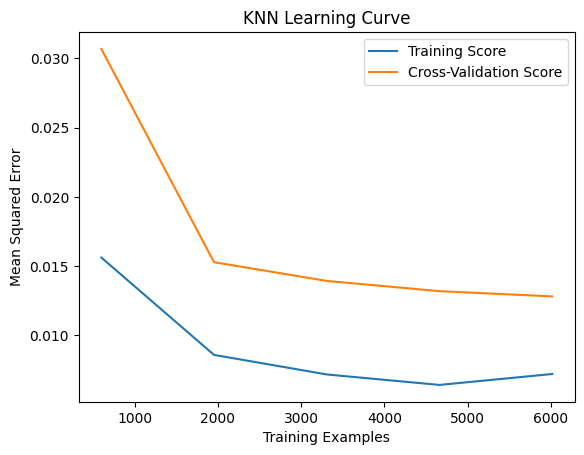

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

train_sizes, train_scores, test_scores = learning_curve(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('KNN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

<h1> RANDOM FOREST </h1>

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [ ]:
rf_pred_rounded_predictions = np.round(rf_pred)
rf_pred_rounded_predictions = np.maximum(rf_pred_rounded_predictions, 0)  # Ensure non-negativity
rf_mse = mean_squared_error(y_test, rf_pred_rounded_predictions)


In [ ]:
rf_mse

0.005319148936170213

<h2>Learning Curve of Random Forest</h2>

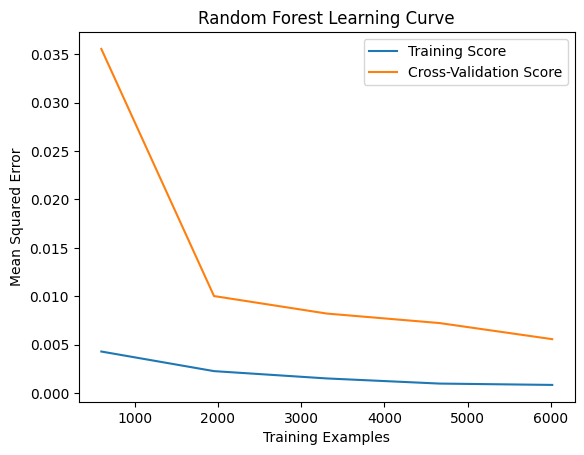

In [ ]:
from sklearn.ensemble import RandomForestRegressor

train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


<h1> SUPPORT VECTOR MACHINE </h1>

In [ ]:
#SVM with linear kernel
svm_linear_model = SVR(kernel='linear')
svm_linear_model.fit(X_train_scaled, y_train)
svm_linear_pred = svm_linear_model.predict(X_test_scaled)

In [ ]:
svm_linear_pred_rounded_predictions = np.round(svm_linear_pred)
svm_linear_pred_rounded_predictions = np.maximum(svm_linear_pred_rounded_predictions, 0)  # Ensure non-negativity
svm_linear_mse = mean_squared_error(y_test, svm_linear_pred_rounded_predictions)


In [ ]:
svm_linear_mse

0.08776595744680851

<h2>Learning Curve of Linear SVM</h2>

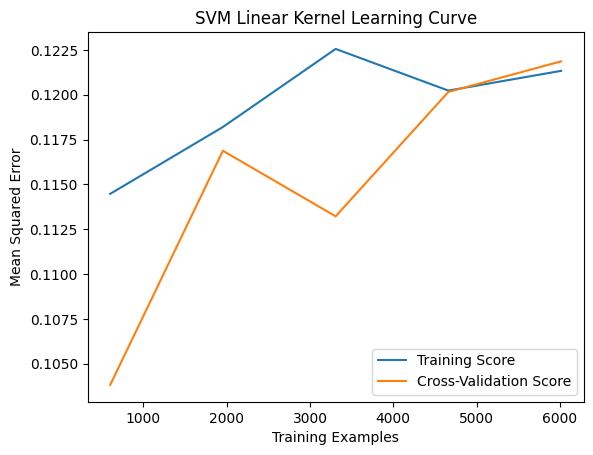

In [ ]:
from sklearn.svm import SVR

train_sizes, train_scores, test_scores = learning_curve(SVR(kernel='linear'), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('SVM Linear Kernel Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [ ]:
# SVM with nonlinear kernel
svm_nonlinear_model = SVR(kernel='rbf')
svm_nonlinear_model.fit(X_train_scaled, y_train)
svm_nonlinear_pred = svm_nonlinear_model.predict(X_test_scaled)
svm_nonlinear_mse = mean_squared_error(y_test, svm_nonlinear_pred)

In [ ]:
svm_nonlinear_pred_rounded_predictions = np.round(svm_nonlinear_pred)
svm_nonlinear_pred_rounded_predictions = np.maximum(svm_nonlinear_pred_rounded_predictions, 0)  # Ensure non-negativity
svm_nonlinear_mse = mean_squared_error(y_test, svm_nonlinear_pred_rounded_predictions)


In [ ]:
svm_nonlinear_mse

0.002127659574468085

<h2> Learning Curve of Non Linear SVM</h2>

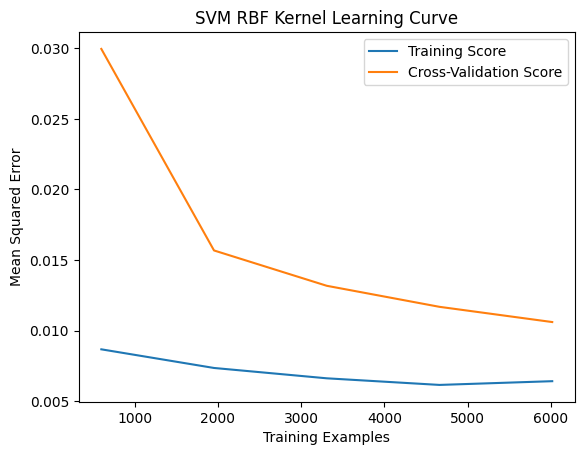

In [ ]:
from sklearn.svm import SVR

train_sizes, train_scores, test_scores = learning_curve(SVR(kernel='rbf'), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.title('SVM RBF Kernel Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [ ]:
np.unique(svm_nonlinear_pred_rounded_predictions)

array([0., 1., 2., 3.])

In [ ]:
cp=(svm_nonlinear_pred_rounded_predictions==y_test)
np.unique(cp)


array([False,  True])

In [ ]:
from collections import Counter
counts = Counter(cp)

# Print or use the counts for each unique value
for value, count in counts.items():
    print(f"{value}: {count} occurrences")

True: 1876 occurrences
False: 4 occurrences


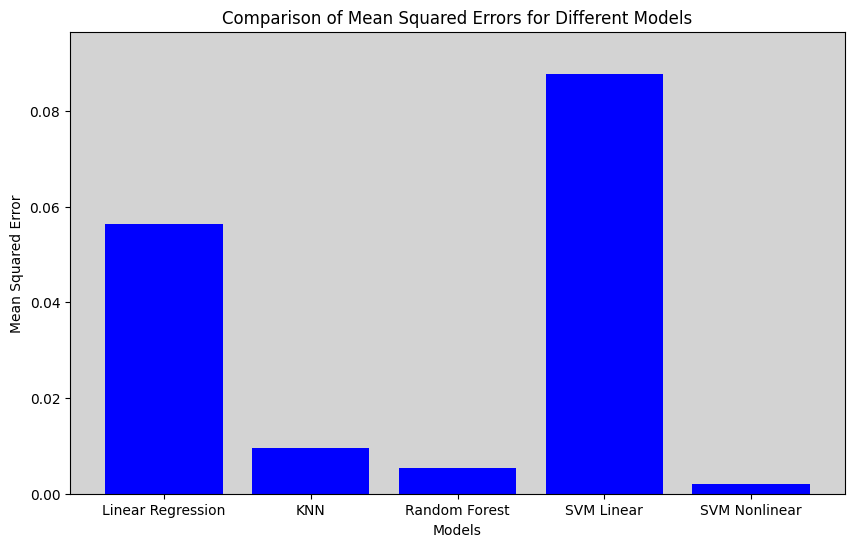

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated mse_values for each model

models = ['Linear Regression', 'KNN', 'Random Forest', 'SVM Linear', 'SVM Nonlinear']
mse_values = [linear_reg_mse, knn_mse, rf_mse, svm_linear_mse, svm_nonlinear_mse]

# Bar plot of MSE for all models
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue')
plt.gca().set_facecolor('lightgray')
plt.title('Comparison of Mean Squared Errors for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 0.1 * max(mse_values))  # Adjust the y-axis limit for better visualization
plt.show()


# VARIABLE SELECTION

<h1>CORRELATION</h1>

In [ ]:
Corr=df.corr()

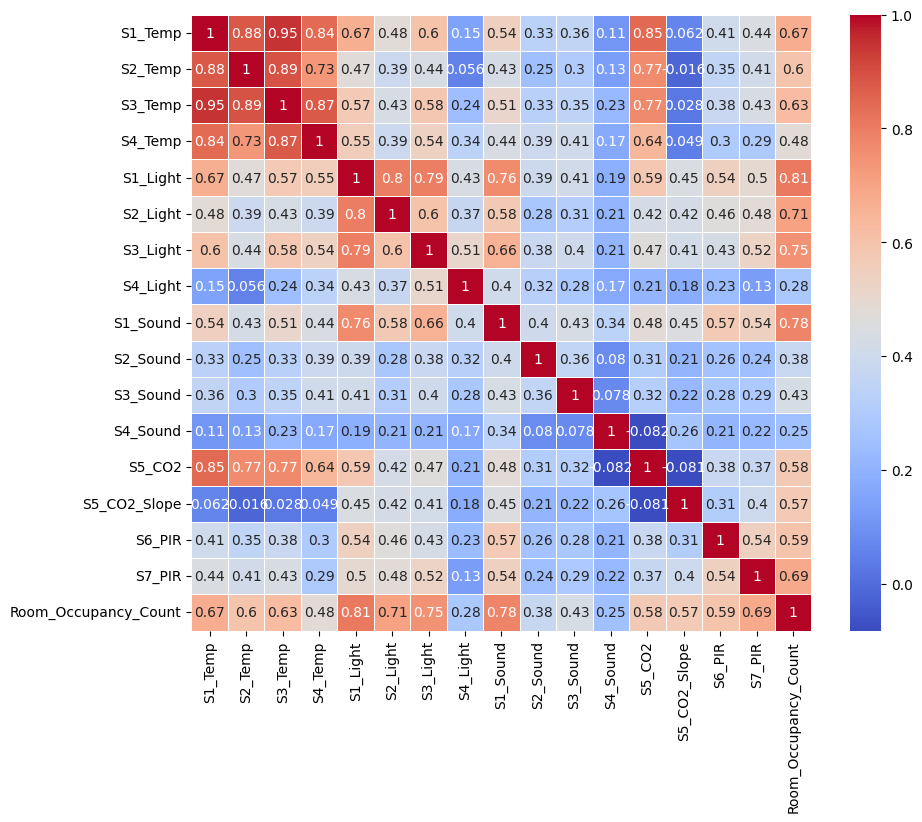

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [ ]:
# Assuming X is your feature matrix and y is your target variable
correlation_matrix = pd.concat([X, y], axis=1).corr()
selected_features_corr = correlation_matrix["Room_Occupancy_Count"].abs().sort_values(ascending=False).index[:len(df.columns)]


In [ ]:
selected_features_corr=selected_features_corr[1:]
print(selected_features_corr)

Index(['S1_Light', 'S1_Sound', 'S3_Light', 'S2_Light', 'S7_PIR', 'S1_Temp',
       'S3_Temp', 'S2_Temp', 'S6_PIR', 'S5_CO2', 'S5_CO2_Slope', 'S4_Temp',
       'S3_Sound', 'S2_Sound', 'S4_Light', 'S4_Sound'],
      dtype='object')


<h1>LASSO REGRESSION</h1>

In [ ]:
from sklearn.linear_model import LassoCV

#providing the penalty by fitting the model with the training data
lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 1,10], cv=5)
lasso.fit(X_train_scaled, y_train)

# Get selected features
selected_features_lasso = X.columns[lasso.coef_ != 0]

# Print non-zero coefficients and corresponding feature names
non_zero_coefficients = lasso.coef_[lasso.coef_ != 0]
print("Non-Zero Coefficients:")
for feature, coef in zip(selected_features_lasso, non_zero_coefficients):

    print(f"{feature}: {coef:.4f}")



Non-Zero Coefficients:
S1_Temp: 0.0068
S2_Temp: 0.1657
S3_Temp: 0.1679
S4_Temp: -0.2094
S1_Light: 0.0945
S2_Light: 0.0813
S3_Light: 0.1175
S4_Light: -0.0339
S1_Sound: 0.1438
S2_Sound: 0.0158
S3_Sound: 0.0340
S4_Sound: -0.0173
S5_CO2: 0.0749
S5_CO2_Slope: 0.2264
S6_PIR: 0.0317
S7_PIR: 0.0863


Sorting the features based on the coefficients to know their importance

In [ ]:
feature_coef_tuples = list(zip(selected_features_lasso, non_zero_coefficients))
sorted_feature_coef_tuples = sorted(feature_coef_tuples, key=lambda x: abs(x[1]), reverse=True)

sorted_features_lasso = []

# Loop through sorted tuples and append features to the list
for feature, coef in sorted_feature_coef_tuples:
    sorted_features_lasso.append(feature)
    print(f"{feature}: {coef:.4f}")

# Now 'sorted_features_lasso' contains the list of features sorted by coefficients
print("Sorted List of Features:", sorted_features_lasso)

S5_CO2_Slope: 0.2264
S4_Temp: -0.2094
S3_Temp: 0.1679
S2_Temp: 0.1657
S1_Sound: 0.1438
S3_Light: 0.1175
S1_Light: 0.0945
S7_PIR: 0.0863
S2_Light: 0.0813
S5_CO2: 0.0749
S3_Sound: 0.0340
S4_Light: -0.0339
S6_PIR: 0.0317
S4_Sound: -0.0173
S2_Sound: 0.0158
S1_Temp: 0.0068
Sorted List of Features: ['S5_CO2_Slope', 'S4_Temp', 'S3_Temp', 'S2_Temp', 'S1_Sound', 'S3_Light', 'S1_Light', 'S7_PIR', 'S2_Light', 'S5_CO2', 'S3_Sound', 'S4_Light', 'S6_PIR', 'S4_Sound', 'S2_Sound', 'S1_Temp']


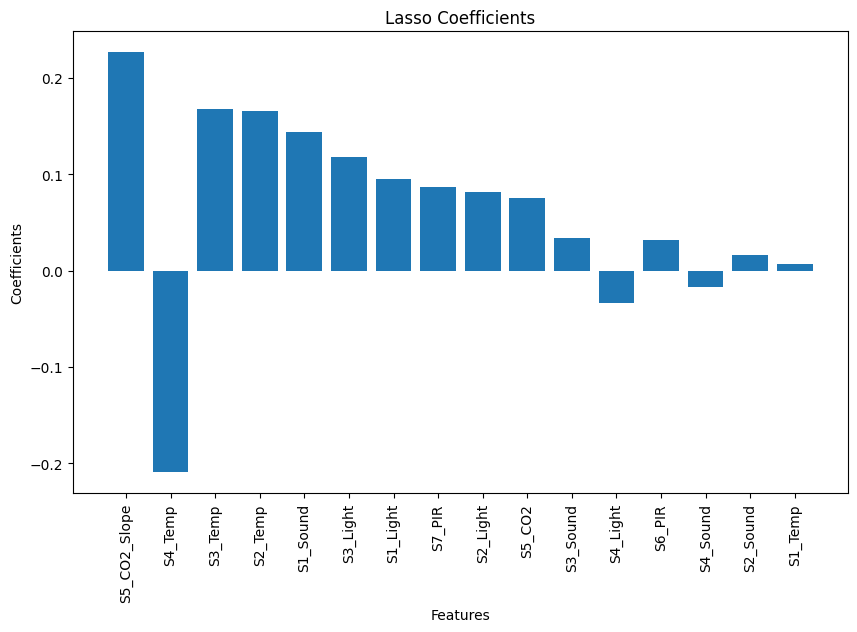

In [ ]:
import matplotlib.pyplot as plt

# Get non-zero coefficients and corresponding feature names
non_zero_coefficients = lasso.coef_[lasso.coef_ != 0]
features_and_coeffs = list(zip(selected_features_lasso, non_zero_coefficients))

# Sort features and coefficients by absolute coefficient value
features_and_coeffs.sort(key=lambda x: abs(x[1]), reverse=True)

# Unzip sorted features and coefficients
sorted_features, sorted_coeffs = zip(*features_and_coeffs)

# Plot the coefficients in order
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coeffs)), sorted_coeffs, align='center')
plt.xticks(range(len(sorted_coeffs)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
plt.show()


<h1> KNN </h1>

Using KNN to  finding the optimal 'k' features that result in the lowest mean squared error on a test set.

In [ ]:

from sklearn.feature_selection import mutual_info_classif

# Calculate information gain for each feature
info_gain = mutual_info_classif(X_train_scaled, y_train)

# Rank features based on information gain
ranked_features = X.columns[np.argsort(info_gain)[::-1]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define a range of k values to search over
k_values = [1, 3, 5, 7, 9,11,13,15,17]

# Initialize variables to keep track of the best k and lowest MSE
best_k = None
lowest_mse = float('inf')  # Initialize with a large value

# Loop over each k value
for k in k_values:
    # Extract the selected features
    selected_features = ranked_features[:k]
    column_indices = [df.columns.get_loc(col) for col in selected_features]

    # Extract the selected features for both training and test sets
    X_train_selected = X_train_scaled[:, column_indices]
    X_test_selected = X_test_scaled[:, column_indices]

    # Instantiate KNN model with weighted option
    knn_model_weighted = KNeighborsRegressor(n_neighbors=5, weights='distance')
    knn_model_weighted.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred_weighted = knn_model_weighted.predict(X_test_selected)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred_weighted)

    # Check if this value of k gives a lower MSE
    if mse < lowest_mse:
        lowest_mse = mse
        best_k = k

# Print the best k value and corresponding lowest MSE
print("Best k value:", best_k)
print("Lowest Mean Squared Error:", lowest_mse)


Best k value: 7
Lowest Mean Squared Error: 0.0009507714681609591


In [ ]:
ranked_features[:7]

Index(['S1_Light', 'S2_Light', 'S5_CO2_Slope', 'S3_Light', 'S2_Temp',
       'S1_Temp', 'S4_Light'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use the top-k ranked features (adjust k based on your needs)
selected_features = ranked_features[:best_k]

column_indices = [df.columns.get_loc(col) for col in selected_features]
# Extract the selected features
X_train_selected = X_train_scaled[:,column_indices]
X_test_selected = X_test_scaled[:,column_indices]

# Instantiate KNN model with weighted option
knn_model_weighted = KNeighborsRegressor(n_neighbors=5, weights='distance')  # Adjust k_neighbors as needed
knn_model_weighted.fit(X_train_selected, y_train)

# Predictions on the test set
y_pred_weighted = knn_model_weighted.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred_weighted)

# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0009507714681609591


In [ ]:
# defining the important features using Random Forest model
feature_importances = rf_model.feature_importances_

# providing feature names from the dataset
feature_names = X_train.columns

# Creating a list of tuples containing feature names and their importances
feature_importance_tuples = list(zip(feature_names, feature_importances))

# Sort the list in descending order based on importance values
sorted_feature_importances = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

rf_features=[]
# Print the sorted feature importances
for feature, importance in sorted_feature_importances:
    rf_features.append(feature)
    print(f"{feature}: {importance}")


S5_CO2_Slope: 0.7303571501456341
S1_Light: 0.14352580739706852
S3_Light: 0.02981359687073393
S2_Light: 0.019792618574080347
S3_Temp: 0.01797231502846981
S4_Light: 0.014825441672803754
S1_Temp: 0.011628588009175782
S7_PIR: 0.010270560149097224
S5_CO2: 0.009355310456661008
S2_Temp: 0.006662364636730842
S4_Temp: 0.0035525569969242243
S2_Sound: 0.0010411462376431126
S4_Sound: 0.0004722889086707465
S1_Sound: 0.00035514576986908663
S6_PIR: 0.00022917149989313567
S3_Sound: 0.00014593764654452214


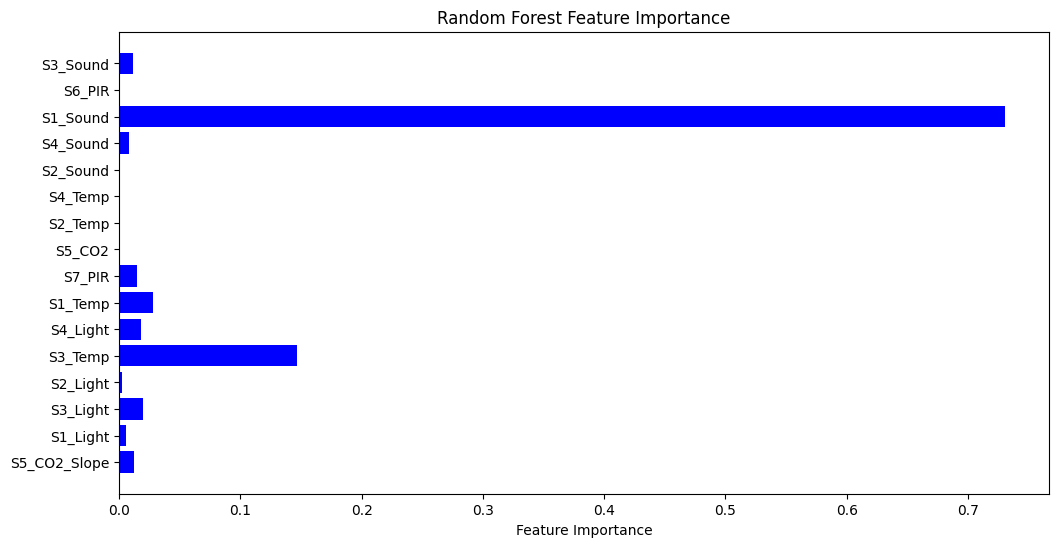

In [ ]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.barh(rf_features, rf_model.feature_importances_, color='blue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
#storing the important features got from random forest model
rf_features

['S5_CO2_Slope',
 'S1_Light',
 'S3_Light',
 'S2_Light',
 'S3_Temp',
 'S4_Light',
 'S1_Temp',
 'S7_PIR',
 'S5_CO2',
 'S2_Temp',
 'S4_Temp',
 'S2_Sound',
 'S1_Sound',
 'S4_Sound',
 'S6_PIR',
 'S3_Sound']

* From all the three methods taken into consideration for variable selection, we can see that there are a mix of variables stated as importance by all three techniques.
* From the modeling techniques we can observe that the svm non linear , random forest and KNN are primarily providing a better fit to the data.
* So, taking into consideration that we can check the important features provided by random forest as a checking factor to assure the best features, we have impleted it and got the best features by random forest model.
* Therefore,we can take features got from LASSO into consideration as the non linearity in the data is identified and importance is provided, which is seen by the lowest mse of non linear SVM.
* Also the correlation also has some common order of important features but still Lasso coincides with a lot of Random forest model and even the best features from KNN ,after training seems to have high effectiveness, hence they are taken into consideration.

# HYPERPARAMETER TUNING

Selecting the best features and choosing the hyperparameters for the best performing models.

In [ ]:
#selecting the features from lasso
selected_features = sorted_features_lasso[:13]
column_indices = [df.columns.get_loc(col) for col in selected_features]

# Extract the selected features for both training and test sets
X_train_selected = X_train_scaled[:, column_indices]
X_test_selected = X_test_scaled[:, column_indices]

In [ ]:
X_train_selected.shape

(7519, 16)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for one of the models (e.g., Random Forest)
rf_param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 5,10,15, 20],
    'min_samples_split': [2, 5,10]
}

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5,scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_rf_model = rf_grid_search.best_estimator_


Best Hyperparameters for Random Forest:
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


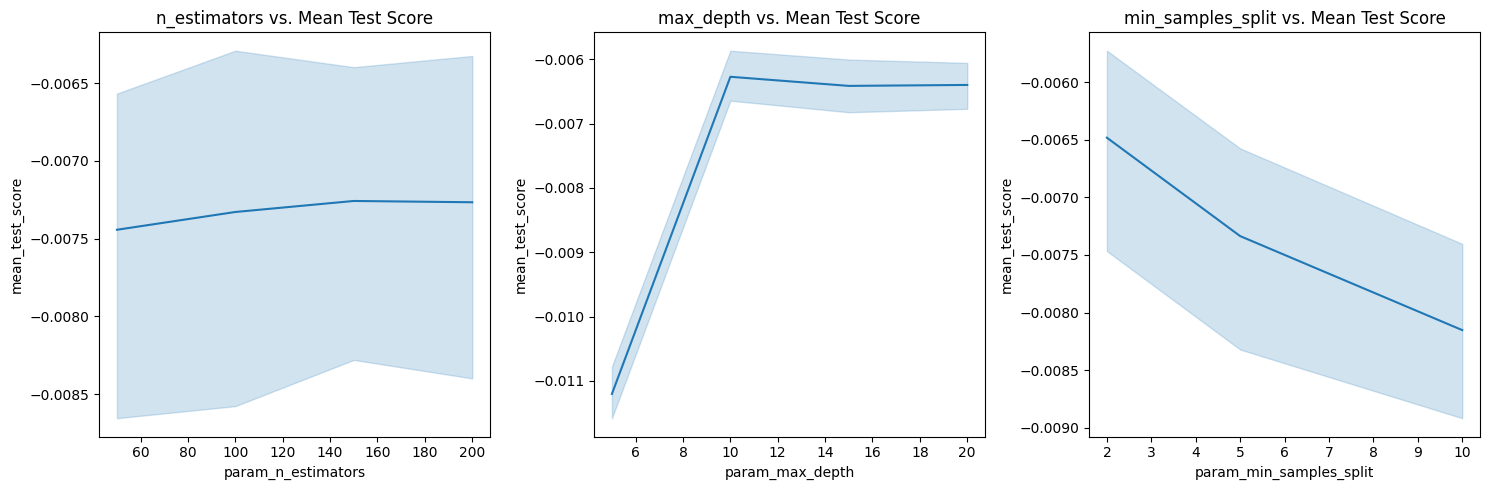

In [ ]:
# Print the best hyperparameters
best_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(best_params)

# Access the grid search results
cv_results = pd.DataFrame(rf_grid_search.cv_results_)

# Plot hyperparameters vs. mean test scores
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 - n_estimators vs. mean_test_score
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=cv_results, ax=axs[0])
axs[0].set_title('n_estimators vs. Mean Test Score')

# Plot 2 - max_depth vs. mean_test_score
sns.lineplot(x='param_max_depth', y='mean_test_score', data=cv_results, ax=axs[1])
axs[1].set_title('max_depth vs. Mean Test Score')

# Plot 3 - min_samples_split vs. mean_test_score
sns.lineplot(x='param_min_samples_split', y='mean_test_score', data=cv_results, ax=axs[2])
axs[2].set_title('min_samples_split vs. Mean Test Score')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming X_train and y_train are your training data
# Assuming X_test and y_test are your test data

# Instantiate a RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators'])

# Train the model on the training data
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model on the test data using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error on Test Data:", mse)


Mean Squared Error on Test Data: 0.004471117021276596


In [ ]:
# testing purpose
rf_mse_after_tuning=0.004471117021276596

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming you have X_train_scaled, X_test_scaled, y_train, y_test defined

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance']
}

# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=5)

selected_features = ranked_features[:13]
column_indices_new = [df.columns.get_loc(col) for col in selected_features]

# Extract the selected features for both training and test sets
X_train_selected = X_train_scaled[:, column_indices_new]
X_test_selected = X_test_scaled[:, column_indices_new]

# Fit the model to the training data
grid_search.fit(X_train_selected,y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Train the model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
best_knn_model.fit(X_train_selected,y_train)

# Make predictions on the test set
knn_pred = best_knn_model.predict(X_test_selected)

# Calculate the mean squared error
knn_mse_after_tuning = mean_squared_error(y_test, knn_pred)

# Print the best hyperparameters and corresponding MSE
print("Best k value:", best_k)
print("Best weights:", best_weights)
print("Lowest Mean Squared Error:", knn_mse_after_tuning)


Best k value: 3
Best weights: distance
Lowest Mean Squared Error: 0.0011523675349235862


<h2>COMPARISON OF THE BEST MODELS BEFORE AND AFTER HYPERPARAMETER TUNING</h2>

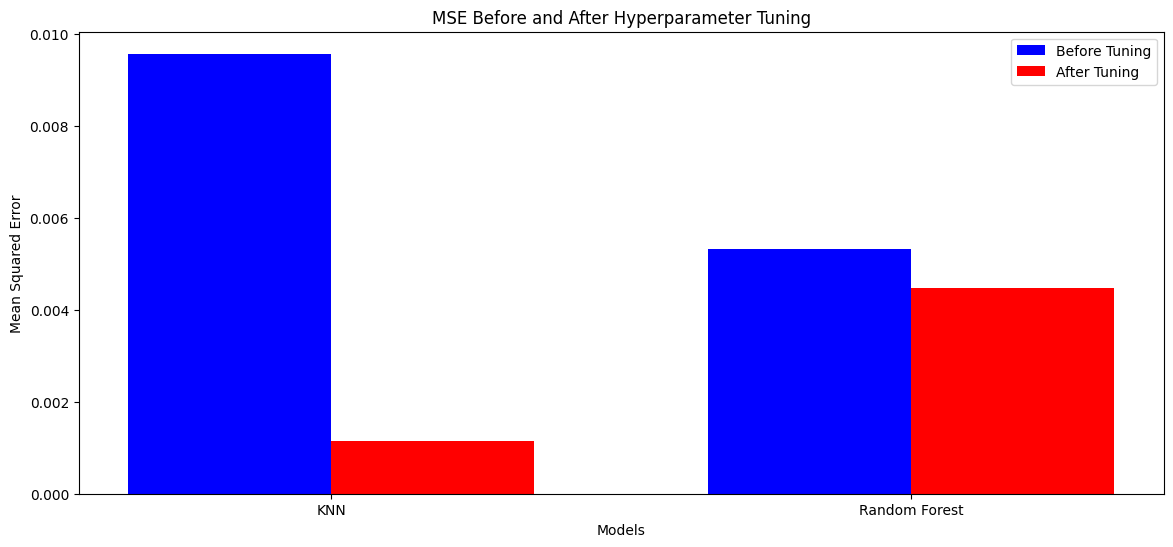

In [ ]:
# Models list
models = ['KNN', 'Random Forest']

# Values before tuning
mse_values_before_tuning = [knn_mse, rf_mse]

# Values after tuning
mse_values_after_tuning = [knn_mse_after_tuning, rf_mse_after_tuning]

# Plotting
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(14, 6))
bar1 = plt.bar(index, mse_values_before_tuning, bar_width, color='blue', label='Before Tuning')
bar2 = plt.bar(index + bar_width, mse_values_after_tuning, bar_width, color='red', label='After Tuning')

plt.title('MSE Before and After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()


# FEATURE SELECTION USING BI-DIRECTIONAL ELIMINATION

In [ ]:
from sklearn.svm import SVR
from mlxtend.feature_selection import SequentialFeatureSelector

# Assuming you have X, y defined

# Create an SVR regressor with an RBF kernel
svm_model = SVR(kernel='rbf')

# Sequential Forward Floating Selection (SFFS)
sffs = SequentialFeatureSelector(svm_model,
                                 k_features=(3, 11),
                                 forward=True,
                                 floating=True,
                                 cv=0)

# Fit SFFS on your data
sffs.fit(X_train_scaled, y_train)

# Get selected feature names
selected_feature_names = list(X.columns[list(sffs.k_feature_idx_)])

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['S1_Temp', 'S2_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S3_Sound', 'S5_CO2_Slope']


In [ ]:
selected_features

['S1_Temp',
 'S2_Temp',
 'S4_Temp',
 'S1_Light',
 'S2_Light',
 'S3_Light',
 'S4_Light',
 'S1_Sound',
 'S3_Sound',
 'S5_CO2_Slope']

In [ ]:
#selecting the features from lasso
selected_features = selected_feature_names
column_indices = [df.columns.get_loc(col) for col in selected_features]

# Extract the selected features for both training and test sets
X_train_selected = X_train_scaled[:, column_indices]
X_test_selected = X_test_scaled[:, column_indices]

KeyError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming you have X_train_scaled, X_test_scaled, y_train, y_test defined

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance']
}

# Create a KNN regression model
knn_model = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, scoring='neg_mean_squared_error', cv=5)

selected_features = ranked_features[:13]
column_indices_new = [df.columns.get_loc(col) for col in selected_features]

# Extract the selected features for both training and test sets
X_train_selected = X_train_scaled[:, column_indices_new]
X_test_selected = X_test_scaled[:, column_indices_new]

# Fit the model to the training data
grid_search.fit(X_train_selected,y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Train the model with the best hyperparameters
best_knn_model = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
best_knn_model.fit(X_train_selected,y_train)

# Make predictions on the test set
knn_pred = best_knn_model.predict(X_test_selected)

# Calculate the mean squared error
knn_mse_after_tuning = mean_squared_error(y_test, knn_pred)

# Print the best hyperparameters and corresponding MSE
print("Best k value:", best_k)
print("Best weights:", best_weights)
print("Lowest Mean Squared Error:", knn_mse_after_tuning)


In [ ]:

from mlxtend.feature_selection import SequentialFeatureSelector

# Sequential Forward Floating Selection (SFFS)
sffs = SequentialFeatureSelector(best_knn_model,
                                 k_features=(3, 11),
                                 forward=True,
                                 floating=True,
                                 cv=0)

# Fit SFFS on your data
sffs.fit(X_train_selected, y_train)

# Get selected feature indices
selected_feature_indices = list(sffs.k_feature_idx_)
# Print the selected features
for i in selected_feature_indices:
  print("Feature: ",selected_features[i-1])

Feature:  S1_Light
Feature:  S2_Light
Feature:  S5_CO2_Slope


# MODEL FITTING USING ADVANCED MODELS

<h2>Fitting the Model using XG BOOST</h2>

* XGBoost is an ensemble learning method that has gained popularity for its high performance in various machine learning tasks.
* It's particularly effective in structured/tabular data and is an extension of the gradient boosting framework.
* It combines the predictions from multiple weak models (typically decision trees) to produce a strong predictive model.

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
# Convert selected features to column indices
column_indices = [X_train.columns.get_loc(col) for col in selected_features]

# Extract columns using column indices
X_train_selected = X_train_scaled[:, column_indices]

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_selected, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_regressor.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07021276595744681


<h2>HYPERPARAMETER TUNING for XG BOOST</h2>

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the XGBRegressor
xgb_regressor = XGBRegressor()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used for fitting the trees
    'gamma': [0, 1, 5],  # Minimum loss reduction required to make a further partition
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_selected, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_xgb_model.predict(X_test_selected)

# Calculate the Mean Squared Error
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (Best Model):", mse_best)


Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error (Best Model): 0.0035309846779488603


In [ ]:
y_pred_xgb_best=y_pred_best
xgb_mse=mse_best
print(xgb_mse)

0.0035309846779488603


<h2>ARTIFICIAL NEURAL NETWORK WITH 2 HIDDEN LAYERS</h2>


* An Artificial Neural Network (ANN) with two hidden layers is a type of deep learning model that consists of an input layer, two hidden layers, and an output layer.
* Each layer is composed of interconnected nodes (neurons), and these connections have associated weights that are adjusted during the training process.
* The model is trained on a labeled dataset, where it learns to make predictions by adjusting the weights based on the training data. The backpropagation algorithm is typically used to propagate errors backward through the network and update the weights.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(len(selected_features),)))
model.add(Dense(units=1, activation='linear'))  # Adjust output units for regression
model.compile(optimizer='SGD', loss='mean_squared_error')  # Use appropriate loss for regression
model.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.0877 - val_loss: 0.0567
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0512 - val_loss: 0.0451
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0422 - val_loss: 0.0382
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0363 - val_loss: 0.0337
Epoch 5/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0320 - val_loss: 0.0303
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0287 - val_loss: 0.0276
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0264 - val_loss: 0.0256
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0245 - val_loss: 0.0247
Epoch 9/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 10/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0214 - val_loss: 0.0217

In [ ]:
y_pred_ann = model.predict(X_test_selected)

# Calculate the Mean Squared Error
ann_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",ann_mse)


59/59 [==============================] - 0s 4ms/step
Mean Squared Error: 0.007722225902079064


<h2>EXTREME MACHINE LEARNING MODEL</h2>


* Extreme Learning Machine is a type of machine learning algorithm for regression, classification, and feature learning.
* It is known for its simplicity and fast training speed.
* The basic idea is to randomly generate the input-to-hidden layer weights and analytically determine the output weights. It's particularly useful for large-scale problems.

In [ ]:
import numpy as np

class ELMRegressor:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.input_weights = np.random.rand(input_size, hidden_size)
        self.output_weights = None

    def train(self, X, y):
        # Randomly generated hidden layer output
        hidden_output = np.dot(X, self.input_weights)
        hidden_output = np.tanh(hidden_output)

        # Analytical solution for output weights
        self.output_weights = np.dot(np.linalg.pinv(hidden_output), y)

    def predict(self, X):
        hidden_output = np.dot(X, self.input_weights)
        hidden_output = np.tanh(hidden_output)

        # Output prediction
        predictions = np.dot(hidden_output, self.output_weights)
        return predictions

# Example usage:
# Assuming X_train, y_train, X_test are your training features, training labels, and test features
input_size = X_train_selected.shape[1]
hidden_size = 100 # Number of hidden neurons (you can adjust this)

elm_model = ELMRegressor(input_size, hidden_size)

# Train the ELM model
elm_model.train(X_train_selected, y_train)

# Make predictions on the test set
predictions = elm_model.predict(X_test_selected)
y_pred_elm=predictions
# Calculate Mean Squared Error (MSE)
eml_mse = np.mean((predictions - y_test)**2)
print("Mean Squared Error:", eml_mse)


Mean Squared Error: 0.47709473930506624


<h2>ENSEMBLE MODEL</h2>

* An ensemble model is a machine learning technique that combines the predictions from multiple individual models to make a more robust and accurate prediction than any of the individual models alone.
* The fundamental idea behind ensemble modeling is that the combination of diverse models can help mitigate individual model weaknesses and capture a more comprehensive representation of the underlying patterns in the data.
* An ensemble involves selecting diverse base models, training them independently, and then combining their predictions.

In [ ]:
y_pred_ann = y_pred_ann.reshape(y_pred_xgb_best.shape[0])
# Combine predictions from top models
ensemble_predictions = (y_pred_xgb_best + y_pred_ann+y_pred_elm) / 3

# Evaluate ensemble performance
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
print(f"Ensemble Mean Squared Error: {ensemble_mse:.2f}")

Ensemble Mean Squared Error: 0.05


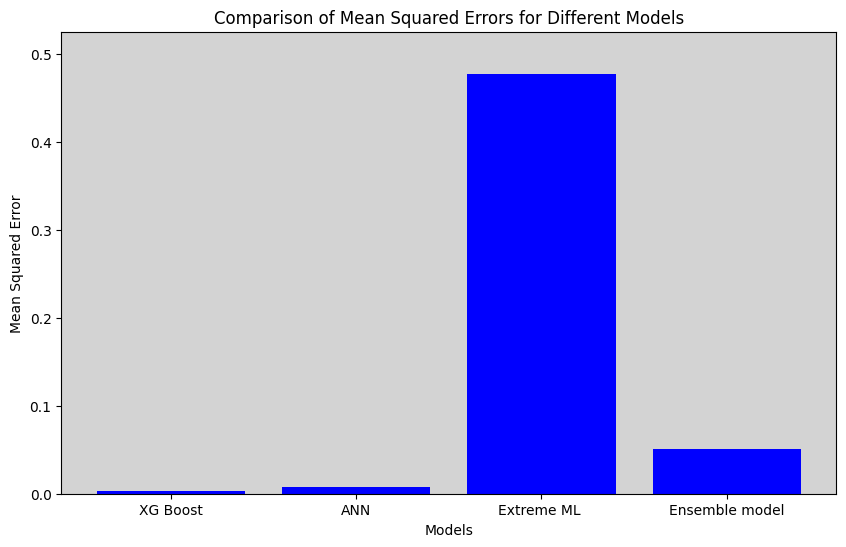

In [ ]:

models = ['XG Boost', 'ANN', 'Extreme ML ', 'Ensemble model']
mse_values = [xgb_mse, ann_mse, eml_mse, ensemble_mse]

# Bar plot of MSE for all models
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue')
plt.gca().set_facecolor('lightgray')
plt.title('Comparison of Mean Squared Errors for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 0.1 * max(mse_values))  # Adjust the y-axis limit for better visualization
plt.show()


# INSIGHTS

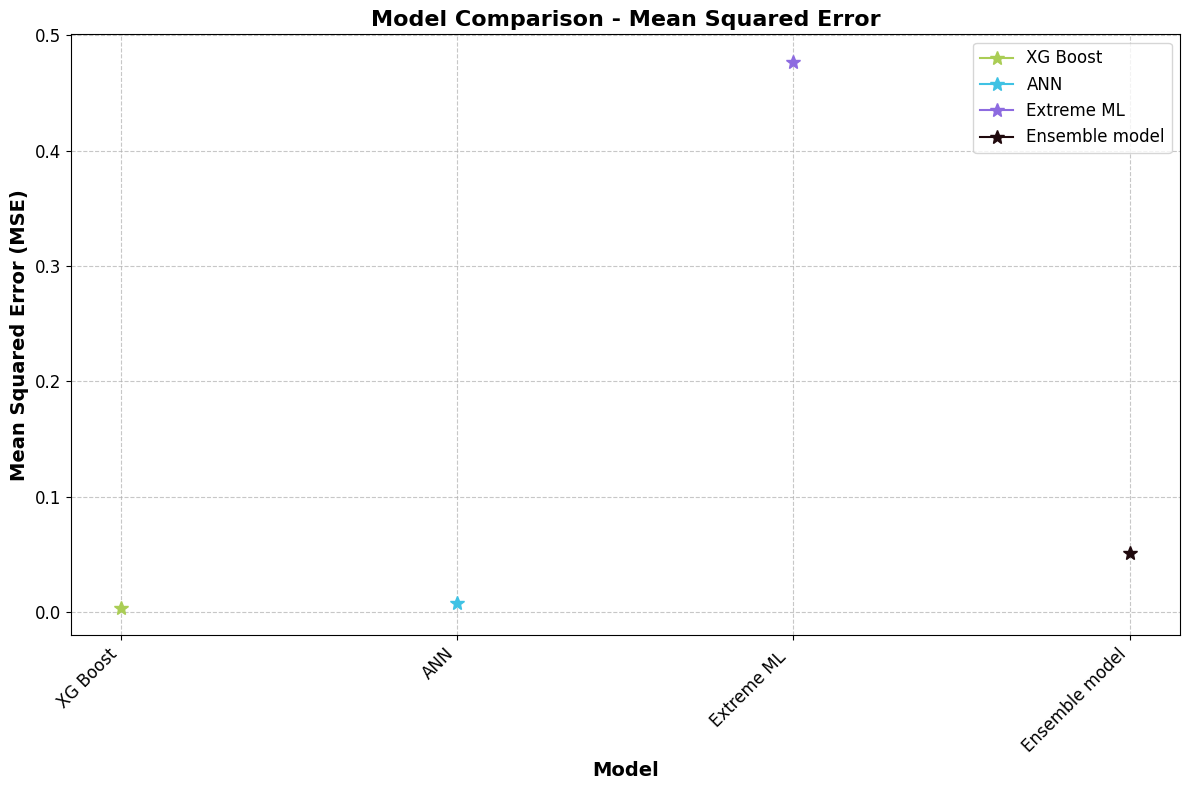

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random colors for each model
colors = np.random.rand(len(models), 3)

plt.figure(figsize=(12, 8))

for model, mse, color in zip(models, mse_values, colors):
    plt.plot(model, mse, marker='*', linestyle='-', color=color, markersize=10, label=model)

plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=14, fontweight='bold')
plt.title('Model Comparison - Mean Squared Error', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image if needed
# plt.savefig('model_comparison_plot.png')

plt.show()


<h2>COMPARING ALL THE MODELS</h2>

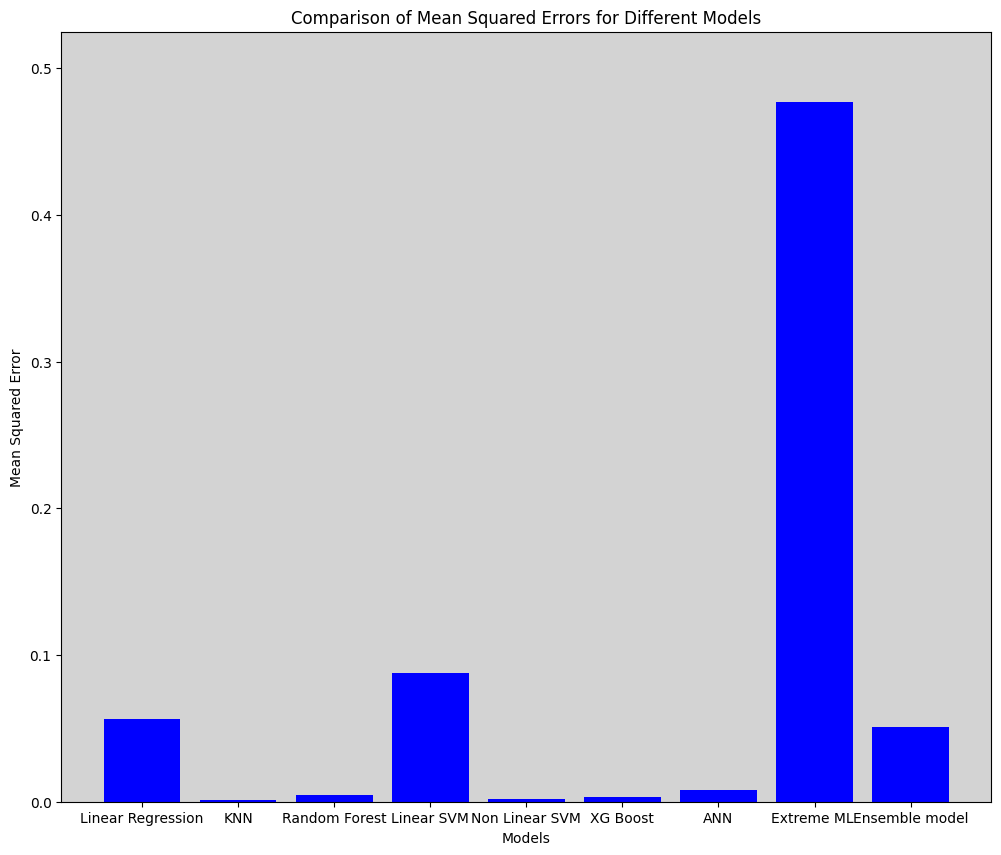

In [ ]:

models = ['Linear Regression','KNN','Random Forest','Linear SVM','Non Linear SVM','XG Boost','ANN', 'Extreme ML ', 'Ensemble model']
mse_values = [linear_reg_mse,knn_mse_after_tuning,rf_mse_after_tuning,svm_linear_mse,svm_nonlinear_mse,xgb_mse, ann_mse, eml_mse, ensemble_mse]

# Bar plot of MSE for all models
plt.figure(figsize=(12, 10))
plt.bar(models, mse_values, color='blue')
plt.gca().set_facecolor('lightgray')
plt.title('Comparison of Mean Squared Errors for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_values) + 0.1 * max(mse_values))  # Adjust the y-axis limit for better visualization
plt.show()


<h2>TOP 3 MODELS</h2>

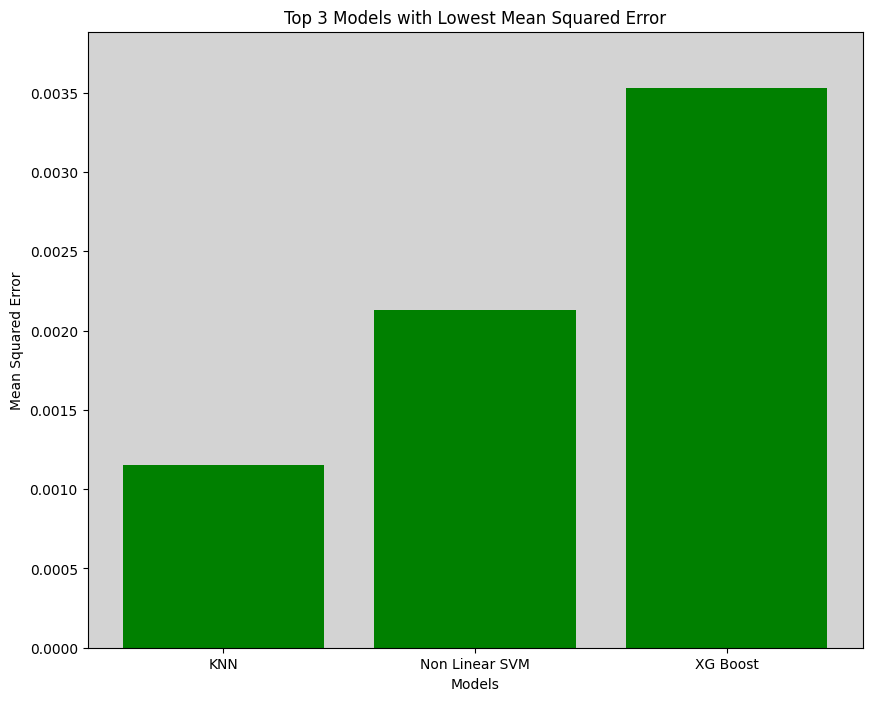

In [ ]:
import numpy as np

# Combine models and MSE values into a numpy array
data = np.array(list(zip(models, mse_values)))

# Sort the array based on MSE values
sorted_data = data[data[:, 1].argsort()]

# Select the top 3 models
top_models = sorted_data[:3, 0]
top_mse_values = sorted_data[:3, 1].astype(float)

# Bar plot for the top 3 models
plt.figure(figsize=(10, 8))
plt.bar(top_models, top_mse_values, color='green')
plt.gca().set_facecolor('lightgray')
plt.title('Top 3 Models with Lowest Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(top_mse_values) + 0.1 * max(top_mse_values))  # Adjust the y-axis limit for better visualization
plt.show()


# INFERENCE

* We can observe that KNN after hyperparameter tuning and feature selection has a better performance over all other models.